In [44]:
# Read cars.csv to cars variable
import pandas as pd
import numpy as np

In [45]:
cars = pd.read_csv('cars.csv')

In [46]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   cars_name     398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [47]:
cars.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
cars_name       0
dtype: int64

As we can see, there are no null values. However, I still need to convert objects: horsepower

In [48]:
cars['horsepower']

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: object

As we can see, its just a string of horsepower, so no need to remove units or anything.

In [49]:
type(cars['horsepower'][0])

str

In [50]:
cars['horsepower'] = cars['horsepower'].astype(float)

ValueError: could not convert string to float: '?'

This throws an error. This is due to non-numeric values being included in the horsepower column.

In [51]:
# Return row number if cars['horsepower'] has a value equal to ?
cars[cars['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,cars_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecars deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


Since we see here that horsepower has values of "?", we can solve this by filling in value with means grouped by cylinders. However, we need to convert all the values from string first, since i ran the group by function and you cannot get a mean from string objects.

In [53]:
# Return list of row index numbers if cars['horsepower'] has a value equal to ?
dropping = cars[cars['horsepower'] == '?'].index.tolist()

cars2 = cars.drop(dropping)

cars2['horsepower'] = cars2['horsepower'].astype(float)
cars2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   cars_name     392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


Success! The side dataset cars2 has horsepower converted to a float value, which can be used to find the means grouped by cylinders.

In [54]:
cylinder_means = cars2.groupby(['cylinders'])['horsepower'].mean()

for i, row in cars[cars['horsepower'] == '?'].iterrows():
    row['horsepower'] = cylinder_means[row['cylinders']]
    cars.iloc[i] = row

In [55]:
cars['horsepower'] = cars['horsepower'].astype(float)

By running the two code chunks above, we replace the missing horsepower data in cars with the means gathered in cars2. We can then run the astype function again to get a fully converted horsepower column

In [56]:
cars[cars['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,cars_name


No more question marks!

In [57]:
print(cylinder_means)
print(cars['horsepower'][336])

cylinders
3     99.250000
4     78.281407
5     82.333333
6    101.506024
8    158.300971
Name: horsepower, dtype: float64
78.28140703517587


Check works out!
Horsepower mean of 4 cylinders: 78.28
Horsepower for cars at entry 336 (4 cylinder): 78.28

No "?" values, all numbers converted to float.

But! I need to do more checks. Like 0 values.

In [58]:
cars[cars['mpg'] == 0]
cars[cars['cylinders'] == 0]
cars[cars['displacement'] == 0]
cars[cars['horsepower'] == 0]
cars[cars['weight'] == 0]
cars[cars['acceleration'] == 0]
cars[cars['model_year'] == 0]
cars[cars['origin'] == 0]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,cars_name


We're all good! No null values, no 0 values, no type discrepancies, etc.

Now, do we need to remove any extraneous columns? Like, what is origin?

In [59]:
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.132947,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.310886,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


As we can see from cars.describe(), there aren't any crazy values for the columns processed. However, there are a few noteable points.
The minimum value for 'mpg' is 9, which is quite low for a typical car, suggesting that it could be an outlier or an older car. The 'weight' varies widely from 1613 to 5140 pounds. The maximum value is substantially higher than the 75th percentile (3608 pounds). Lastly, the 'acceleration' ranges from 8 to 24.8. The minimum value here is very low, suggesting a very high acceleration capacity, possibly indicating a sports car.

In [60]:
# return info of cars["origin"]
cars['origin'].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In my personal opitnion, I will drop 'otigin', since A - It only has 3 values it can possibly be, B - I do not know what it means in the grand scheme of the dataset (and therefore I would feel uncomfortable using it) and C - I do not know if it is ordinal or not.

In [61]:
cars.drop(['origin'], axis=1, inplace=True)

In [62]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   cars_name     398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


The data has been processed! The last thing we need to do is prepare cars_name for encoding so it can be used in our modeling.

In [64]:
# one hot encoding of cars name
cars['cars_name'] = cars['cars_name'].astype('category')

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

origin_encoded = encoder.fit_transform(cars[['cars_name']])

# Convert the result back to a DataFrame
origin_encoded_df = pd.DataFrame(origin_encoded, columns=encoder.get_feature_names_out(['cars_name']))
# To send the data back to the cars dataframe, we concatenate the two dataframes, which means we add the columns from the origin_encoded_df dataframe to the cars dataframe
cars = pd.concat([cars.drop('cars_name', axis=1), origin_encoded_df], axis=1)

First, we convert the cars name to a categorical variable, then instantiate the encoder. Now, all we need to do is encode the cars_name using the fit_transform() function. We then create a dataframe of the encoded car names using the get_feature_names_out function, which finds the feature names after encoding. We then concatenate the dataframes and save it in cars.

In [65]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Columns: 312 entries, mpg to cars_name_vw rabbit custom
dtypes: float64(309), int64(3)
memory usage: 970.3 KB


Now, lets look at relationships between the variables in our cars dataframe!

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='mpg', ylabel='Count'>

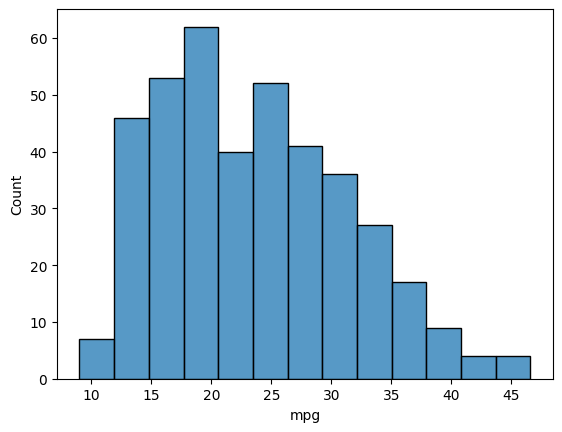

In [67]:
sns.histplot(data=cars['mpg'] )

<Axes: xlabel='weight', ylabel='Count'>

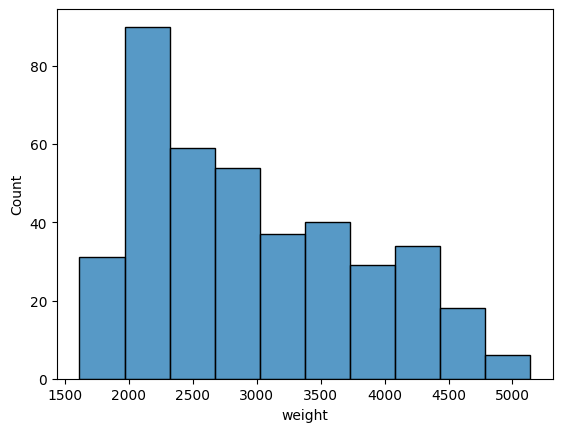

In [68]:
sns.histplot(data=cars['weight'] )

<Axes: xlabel='horsepower', ylabel='Count'>

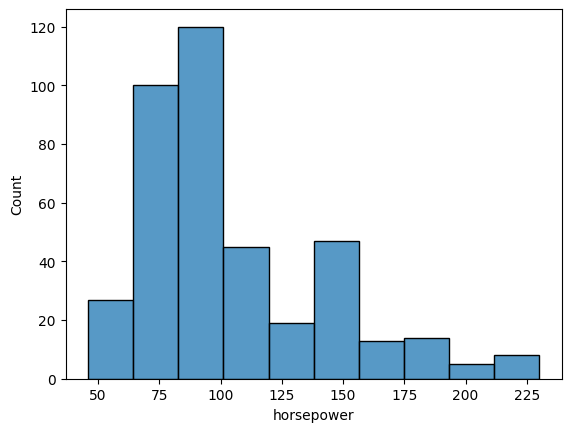

In [69]:
sns.histplot(data=cars['horsepower'], bins=10)

<Axes: xlabel='cylinders', ylabel='count'>

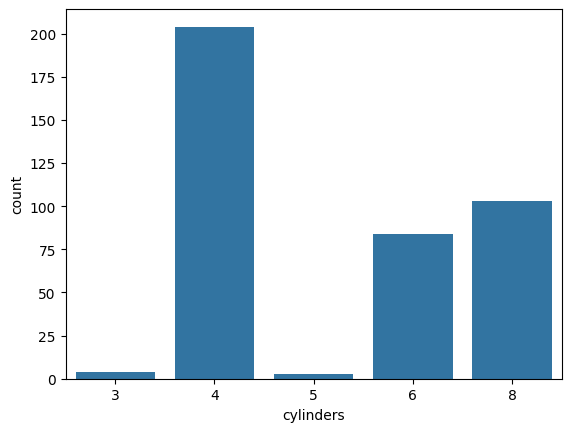

In [70]:
sns.countplot(x=cars['cylinders'])

With some of the main variables shows in univariate plots, let's look at some bivariate relationships!

<Axes: xlabel='weight', ylabel='mpg'>

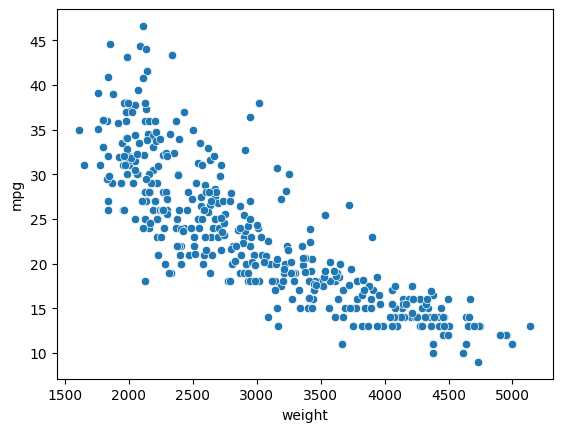

In [71]:
# Scatterplot of weight vs mpg
sns.scatterplot(x='weight', y='mpg', data=cars)

This graph shows us the relationship between the weight and mpg variables in the cars dataset. It seems that as the weight of the car increases, the mpg tends to decrease. This makes sense because the increase in weight makes the car use more fuel generally.

<Axes: xlabel='weight', ylabel='mpg'>

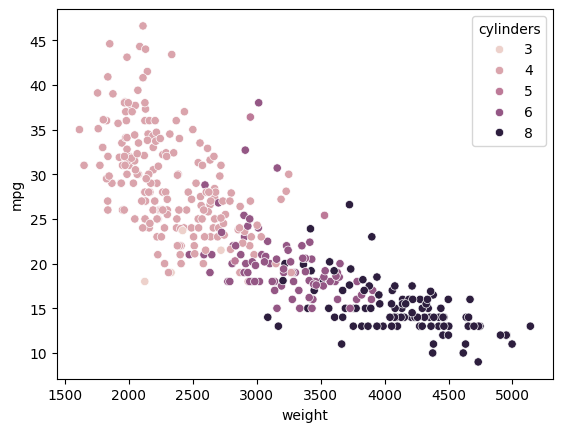

In [72]:
# Scatterplot with hue
sns.scatterplot(x='weight', y='mpg', data=cars, hue='cylinders')

This graph is also great because not only does it show the relationship between weight and mpg like before, but also changes the hue of the plotted points based on the cylinders. This shows us that cars with more weight have more cylinders generally, and the more cylinders you have the lower mpg you get generally.

<Axes: xlabel='model_year', ylabel='mpg'>

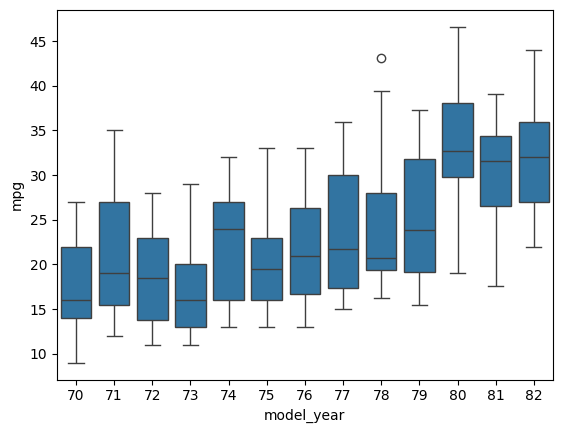

In [73]:
# A Boxplot based on car year for each boxplot
sns.boxplot(x='model_year', y='mpg', data=cars)

The plot above is great in showing how the model_year relates to mpg. We can see in the boxplots that as the model year goes up (the car gets more modern), the mpg also tends to increase. This shows how car technology improved over the years.

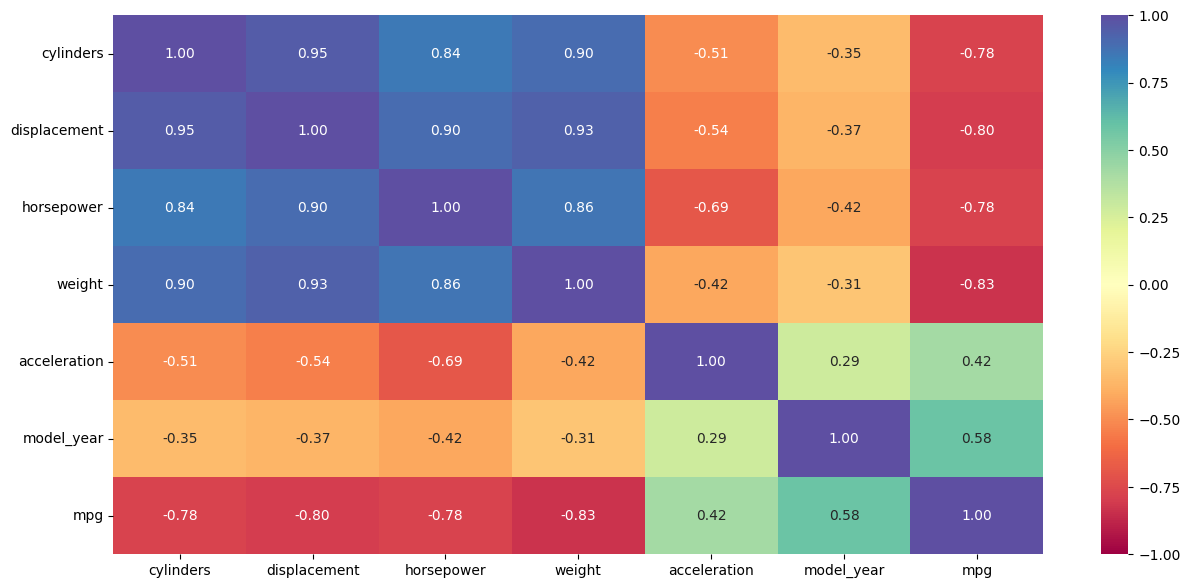

In [16]:
# Making a heatmap of the correlation matrix
# columns to corrolate
corr_cols=['cylinders','displacement','horsepower','weight','acceleration','model_year','mpg']

# increate the figure size
plt.figure(figsize=(15, 7))

# the actual heat map
sns.heatmap(
   cars[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)

# show the plot
plt.show()

This corerelation heatmap is a great visualization on how the variables influence each other. There are strong positive correlations among 'cylinders', 'displacement', 'horsepower', and 'weight'. Also, the 'mpg' variable shows strong negative correlations with 'cylinders', 'displacement', 'horsepower', and 'weight'. There's a moderate positive correlation between 'model_year' and 'mpg', implying that newer models are generally more fuel-efficient. Next, 'Acceleration' shows a moderate negative correlation with 'cylinders', 'displacement', and 'horsepower'. Lastly, 'Model_year' seems relatively independent of 'cylinders', 'displacement', and 'horsepower' with only a weak negative correlation.

Running the code below will throw an error due to 'car_name' being included. Car name was encoded, and does not have any numerical correlations (since it originally was categorical), so it does not work with a correlation heatmap.

In [17]:
# columns to corrolate
corr_cols=['cylinders','displacement','horsepower','weight','acceleration','model_year','mpg','cars_name']

# increate the figure size
plt.figure(figsize=(15, 7))

# the actual heat map
sns.heatmap(
   cars[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)

# show the plot
plt.show()

KeyError: "['cars_name'] not in index"

<Figure size 1500x700 with 0 Axes>

# Now, we can move on to part 2, fitting the linear regression model!

In [37]:
from sklearn.model_selection import train_test_split

# Define the target variable and the independent variables
y = cars['mpg']
X = cars.drop('mpg', axis=1)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Train test splitting by defining X and Y, then train the linear regression model on the data

In [39]:
# Fit a linear regression model to the training data
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
# Accuracy score cannot be used for regression models, so we use the R2 score instead
from sklearn.metrics import r2_score

y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

-1.2234354469148066e+17

An R2 Score is a measure of "Best fitness" with a linear regression model to the data.

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Testing and Training predictions saved as variables for easy analysis
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

# Mean Absolute Error (MAE)
mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

# Mean Squared Error (MSE)
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

# R-squared (R2)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

# Print Results of model accuracy
print("Test MAE:", mae_test)
print("Train MAE:", mae_train)
print("Test MSE:", mse_test)
print("Train MSE:", mse_train)
print("Test R2:", r2_test)  
print("Train R2:", r2_train)

Test MAE: 2.6409273036381777
Train MAE: 0.3929869901223548
Test MSE: 12.090325407820675
Train MSE: 0.7469805502142375
Test R2: 0.7854085138853747
Train R2: 0.9879651531036833


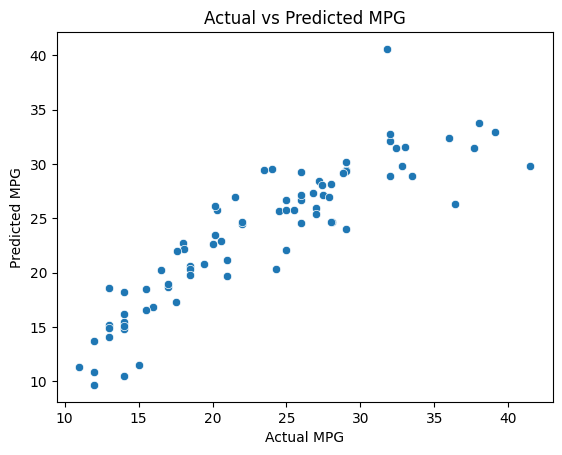

In [43]:
# Plot actual vs predicted values using seaborn
sns.scatterplot(x=y_test, y=y_pred_test)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
plt.show()